# CSCI 3022 Final Project: *Spotify Songs*

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import scipy.stats as stats
%matplotlib inline

## Data Cleaning

In [2]:
#Importing csv file into pandas data frame
#Making sure country code NA not seen as NaN, and makingh sure missing genres are NaN
dfSong = pd.read_csv("all_spotify_data.csv",keep_default_na=False,na_values=['None','Not Found','[]'])



#Dropping unnecesary columns
dfSong.drop(["Unnamed: 0","Track_ID","Year"],axis='columns',inplace=True)
print(dfSong.info())

#Removing all songs with NaN's without
dfSong_clean = dfSong.dropna()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184000 entries, 0 to 183999
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   Unnamed: 0   184000 non-null  int64 
 1   Artist_Name  184000 non-null  object
 2   Track_Name   184000 non-null  object
 3   Popularity   184000 non-null  int64 
 4   Track_ID     184000 non-null  object
 5   Genres       179206 non-null  object
 6   Country      184000 non-null  object
 7   Year         184000 non-null  int64 
dtypes: int64(3), object(5)
memory usage: 11.2+ MB
None
   Unnamed: 0    Artist_Name                                     Track_Name  \
0           0  Billie Eilish                           lovely (with Khalid)   
1           1    Post Malone  Sunflower - Spider-Man: Into the Spider-Verse   
2           2  Alec Benjamin                             Let Me Down Slowly   
3           3  Calvin Harris                       One Kiss (with Dua Lipa)   
4           4     T

In [ ]:
#Looking at the data
print(dfSong.info())
print(dfSong.head())

## Popularity
#### Finding mean, median, and mode popularity score of songs:

In [3]:
#Mean
avgPop = dfSong["Popularity"].mean()
print("The mean popularity rating of all the songs is {:.2f}.".format(avgPop))

#Median
medPop = dfSong["Popularity"].median()
print("The median popularity rating of all the songs is {:.1f}.".format(medPop))

#Mode
modePop = dfSong["Popularity"].mode()
print("The mode popularity rating of all the songs is ",end="")
[print(i,end=" ") for i in modePop]; #Print all modes without brackets around array


The mean popularity rating of all the songs is 70.40.
The median popularity rating of all the songs is 71.0.
The mode popularity rating of all the songs is 69 

#### Making boxplot of popularity scores:

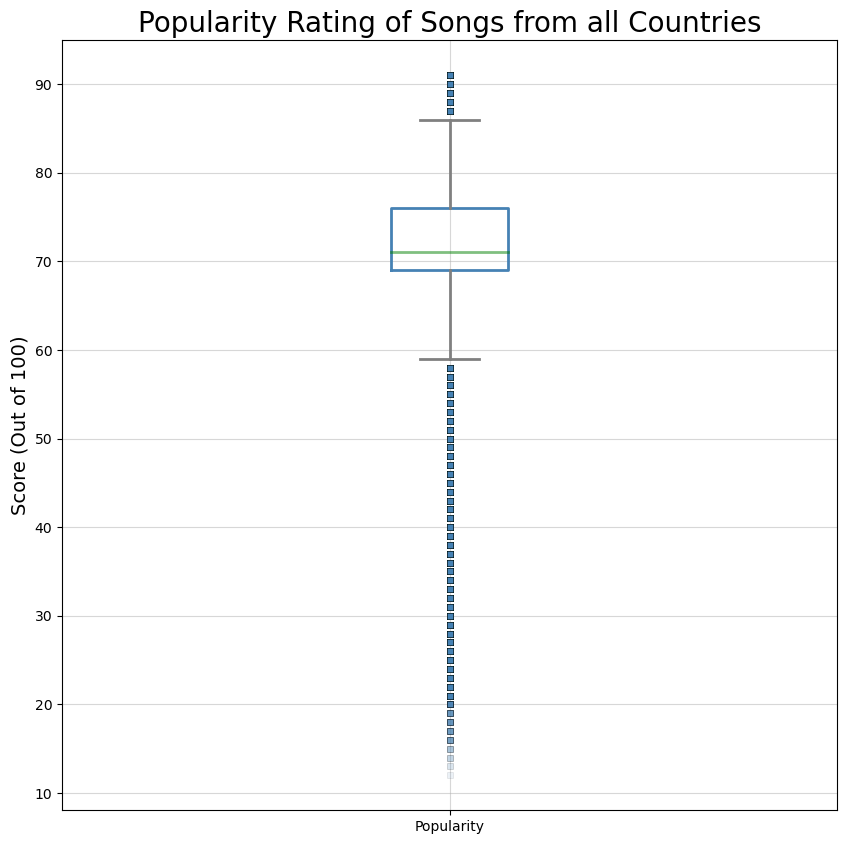

In [4]:
#Initialize figure
fig, ax = plt.subplots(figsize=(10,10))

# Plot boxplot; returns dictionary of style parameters
bpPop = dfSong.boxplot(column="Popularity",ax=ax,return_type='dict',labels=None);

# ---------------------------------------
# Set properties of various parts of plot 
# ---------------------------------------

# Change properties of boxes 
for box in bpPop['boxes']:
    box.set(color='steelblue', linewidth=2)
    
# Change properties of whiskers 
for whisker in bpPop['whiskers']:
    whisker.set(color='gray', linewidth=2)
    
# Change properties of caps 
for cap in bpPop['caps']:
    cap.set(color='gray', linewidth=2)
    
# Change properties of median 
for cap in bpPop['medians']:
    cap.set(color='green', linewidth=2, alpha=0.5)
    
# Change properties of fliers (outliers) 
for flier in bpPop['fliers']:
    flier.set(markerfacecolor='steelblue', marker='s', markersize=5, alpha=0.05, markeredgewidth=0.5)

# Make grid-lines lighter
ax.grid(alpha=0.5)
ax.set_title("Popularity Rating of Songs from all Countries", fontsize=20)
plt.xticks([1],['Popularity'])
ax.set_ylabel('Score (Out of 100)',fontsize=14);

#### Making histogram of popularity scores:

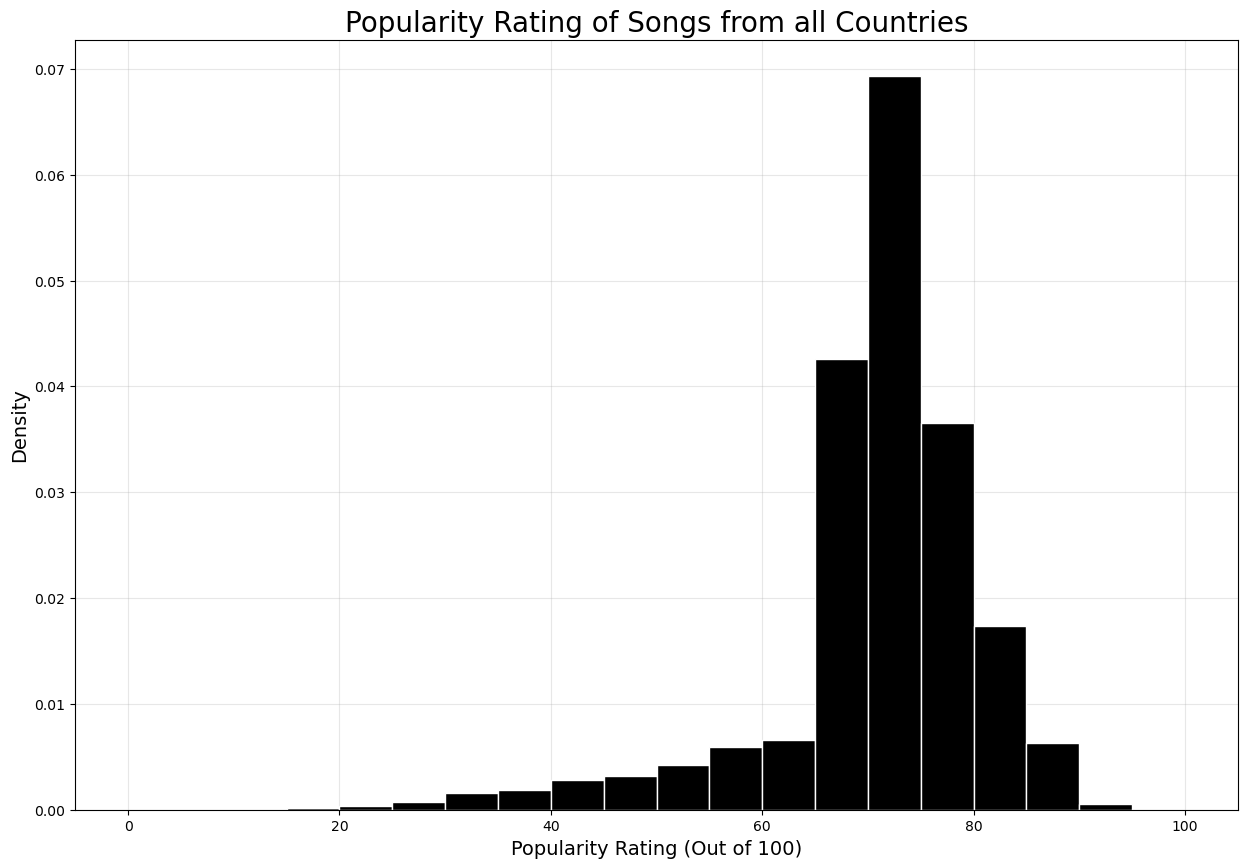

In [5]:
#Initialize figure
fig, ax = plt.subplots(figsize=(15,10))

#Plot histogram
myBin = range(0,101,5)
dfSong["Popularity"].hist(ax=ax,bins=myBin,density=True,edgecolor='w',facecolor=(0,0,0))

#Formatting and labeling
ax.grid(alpha=0.3)
ax.set_axisbelow(True)
ax.set_title("Popularity Rating of Songs from all Countries", fontsize=20)
ax.set_xlabel("Popularity Rating (Out of 100)", fontsize=14)
ax.set_ylabel("Density", fontsize=14);

### Plotting distribution of mean popuarity scores from each country

In [6]:
#Getting array of countries
countries = dfSong["Country"].unique()
n = countries.size #Number of countries

#Initializing array to hold mean popularity score from all countries
countryMeanPop = np.zeros(n)

#Calculating mean popularity score from all countries
for i in range(n):
    countryMeanPop[i] = dfSong.loc[dfSong['Country']==countries[i],'Popularity'].mean()

print(f"The mean of the average popularity score from each country is {np.mean(countryMeanPop) :.2f}")

The mean of the average popularity score from each country is 70.40


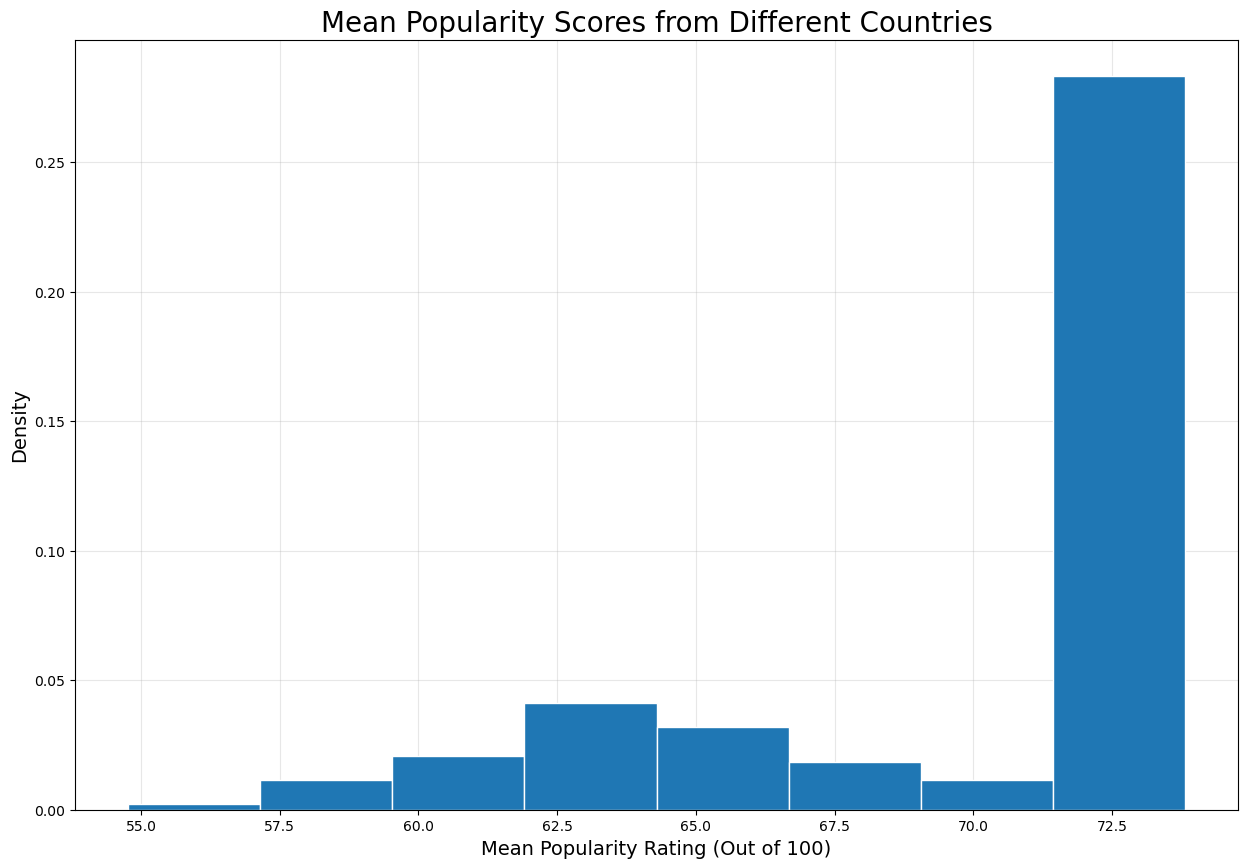

In [7]:
#Initializing figure
fig, ax = plt.subplots(figsize=(15,10))

#Plotting distribution
pd.Series(countryMeanPop).hist(ax=ax,bins=8,density=True,edgecolor='w')

#Formatting and labeling
ax.grid(alpha=0.3)
ax.set_axisbelow(True)
ax.set_title("Mean Popularity Scores from Different Countries", fontsize=20)
ax.set_xlabel("Mean Popularity Rating (Out of 100)", fontsize=14)
ax.set_ylabel("Density", fontsize=14);

## Genre

In [8]:
#Get all generes

dfSong_clean.loc[:,"Genres"] = dfSong_clean["Genres"].apply(eval)

#Checking whether string-to-list conversion worked
# for i,l in enumerate(dfSong_clean["Genres"][:10]):
#     print("list",i,"is",type(l))

/tmp/ipykernel_249/1157793785.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfSong_clean.loc[:,"Genres"] = dfSong_clean["Genres"].apply(eval)


### Finding top most common genre

In [9]:
#Getting list of unique genres and their count
g, n = np.unique(np.hstack(dfSong_clean["Genres"].values),return_counts=True)

indBigG = np.argsort(n)[::-1] #indices of most common genre

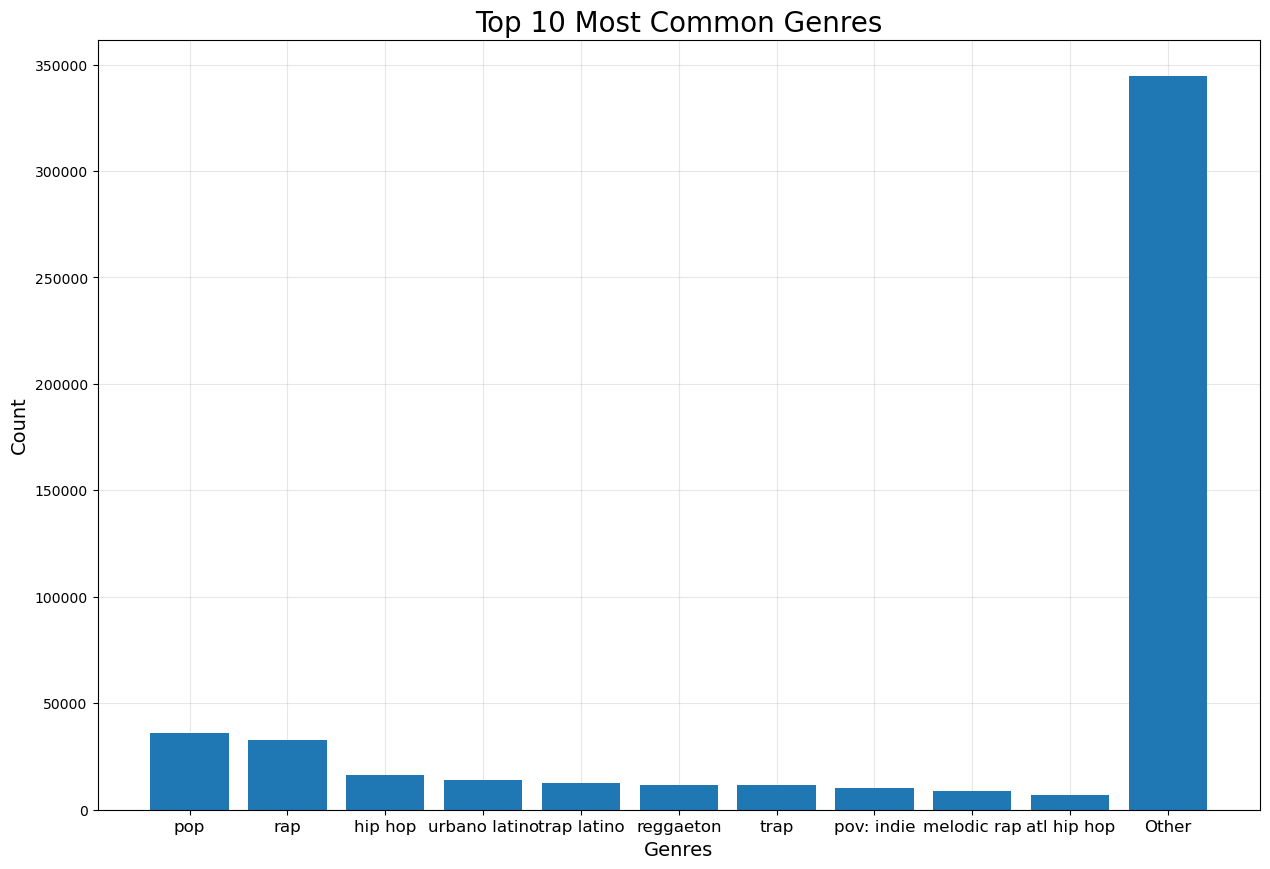

In [10]:
#Initializing figure
fig, ax = plt.subplots(figsize=(15,10))

#Top k common genres
k = 10 
topG = np.append(g[indBigG[:k]],['Other'])
topN = np.append(n[indBigG[:k]],[n[indBigG[k:]].sum()])

#Plotting bar chart of top genre count
ax.bar(topG,topN)

#Formatting and labeling
ax.grid(alpha=0.3)
ax.set_axisbelow(True)
ax.set_title("Top {} Most Common Genres".format(k), fontsize=20)
ax.set_xlabel("Genres", fontsize=14)
ax.set_ylabel("Count", fontsize=14);
for tick in ax.get_xticklabels():
    if k > 10: #Make room for labels if many bars
        tick.set_rotation(-45)
    tick.set_fontsize(12)


### Finding mean, median, and mode of the counts for each genre

In [11]:
#Mean
print("The mean genre count from all the songs is {:.2f}".format(np.mean(n)))

#Median
print("The median genre count from all the songs is {}".format(np.median(n)))

#Mode
print("The mode genre count from all the songs is {}".format(stats.mode(n)[0]))


The mean genre count from all the songs is 230.16
The median genre count from all the songs is 9.0
The mode genre count from all the songs is [1]


/tmp/ipykernel_249/2792813296.py:8: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  print("The mode genre count from all the songs is {}".format(stats.mode(n)[0]))


## Most common genres from each country

In [12]:
#k most common genres from each country
countryTopG = []
for ctry in countries:
    #Getting list of unique genres and their count
    g, n = np.unique(np.hstack(dfSong_clean.loc[dfSong_clean["Country"]==ctry,"Genres"].values),return_counts=True)
    indBigG = np.argsort(n)[::-1] #indices of most common genre
    countryTopG.append(g[indBigG[0]])
